In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
og_dataset = pd.read_csv('datasetCreated/results.csv')
og_dataset

,data_object,initial_completeness,technique_completeness,ml_algorithm,final_ml_value
0,default of credit card clients_x6,0.501188,impute_standard,DecisionTree,0.782465
1,default of credit card clients_x6,0.501188,impute_mean,DecisionTree,0.782406
2,default of credit card clients_x6,0.501188,impute_median,DecisionTree,0.782433
3,default of credit card clients_x6,0.501188,impute_random,DecisionTree,0.771792
4,default of credit card clients_x6,0.501188,impute_knn,DecisionTree,0.783590
...,...,...,...,...,...
59395,numerai28.6_attribute_20,0.049812,impute_knn,SVC,0.487660
59396,numerai28.6_attribute_20,0.049812,impute_mice,SVC,0.484871
59397,numerai28.6_attribute_20,0.049812,impute_linear_regression,SVC,0.484871
59398,numerai28.6_attribute_20,0.049812,impute_random_forest,SVC,0.486971


In [7]:
# For each unique triple data_object,initial_completeness, ml_algorith, calculate the percentage difference between top 3 max final_ml_value
# Group by the unique triple and find the top 3 max values for each group
grouped_dataset = og_dataset.groupby(['data_object', 'initial_completeness', 'ml_algorithm'])

In [8]:
# For each group, find the 'technique_completeness' corresponding to the top 1 max 'final_ml_value'
technique_frequency_1 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
for name, group in grouped_dataset:
    top_1_max_values = group.nlargest(1, 'final_ml_value')
    imputation_technique = top_1_max_values['technique_completeness'].values[0]
    if imputation_technique in technique_frequency_1:
        technique_frequency_1[imputation_technique] += 1
    else:
        technique_frequency_1[imputation_technique] = 1

In [9]:
# Order the dictionary 
technique_frequency_1

{'impute_standard': 653,
 'impute_mean': 543,
 'impute_median': 503,
 'impute_random': 436,
 'impute_knn': 1426,
 'impute_mice': 568,
 'impute_linear_regression': 491,
 'impute_random_forest': 1564,
 'impute_cmeans': 416}

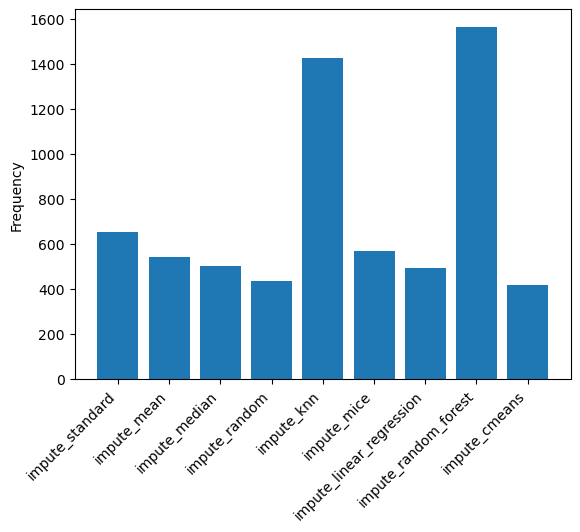

In [10]:
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 1 max values
# Add title, x-axis and y-axis label
plt.bar(technique_frequency_1.keys(), technique_frequency_1.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

In [11]:
# For each group, find the 'technique_completeness' corresponding to the top 3 max 'final_ml_value'
technique_frequency_3 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
for name, group in grouped_dataset:
    top_3_max_values = group.nlargest(3, 'final_ml_value')
    for index, row in top_3_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_3:
            technique_frequency_3[imputation_technique] += 1
        else:
            technique_frequency_3[imputation_technique] = 1

In [12]:
technique_frequency_3

{'impute_standard': 1852,
 'impute_mean': 2074,
 'impute_median': 1932,
 'impute_random': 1077,
 'impute_knn': 3176,
 'impute_mice': 2450,
 'impute_linear_regression': 2259,
 'impute_random_forest': 3380,
 'impute_cmeans': 1600}

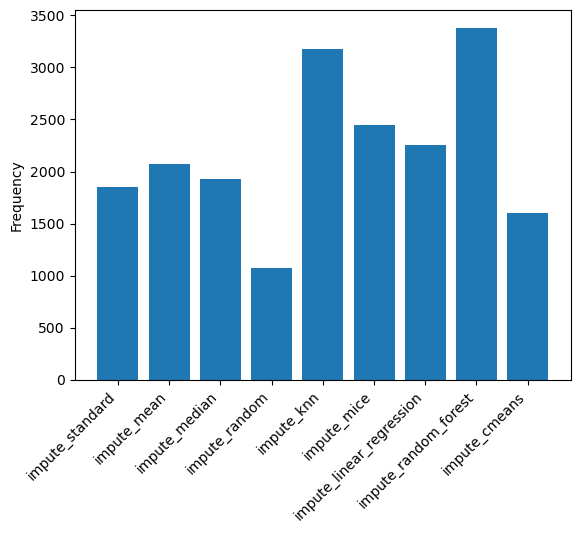

In [13]:
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_3.keys(), technique_frequency_3.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

# Special Analysis

In [14]:
# For each group, find the 'technique_completeness' corresponding to the top 3 max 'final_ml_value'
# Just for name 
technique_frequency_3 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}

In [15]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'BachChoralHarmon'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(['data_object', 'initial_completeness', 'ml_algorithm'])
grouped_dataset

In [16]:
# Just if data_object cont
for name, group in grouped_dataset:
    top_3_max_values = group.nlargest(3, 'final_ml_value')
    for index, row in top_3_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_3:
            technique_frequency_3[imputation_technique] += 1
        else:
            technique_frequency_3[imputation_technique] = 1
            
technique_frequency_3

{'impute_standard': 23,
 'impute_mean': 30,
 'impute_median': 31,
 'impute_random': 6,
 'impute_knn': 13,
 'impute_mice': 31,
 'impute_linear_regression': 16,
 'impute_random_forest': 13,
 'impute_cmeans': 17}

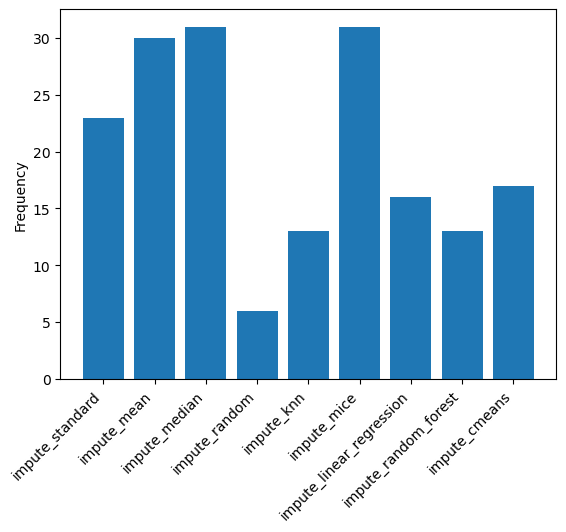

In [17]:
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_3.keys(), technique_frequency_3.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

{'impute_standard': 72, 'impute_mean': 114, 'impute_median': 95, 'impute_random': 39, 'impute_knn': 71, 'impute_mice': 100, 'impute_linear_regression': 82, 'impute_random_forest': 74, 'impute_cmeans': 73}


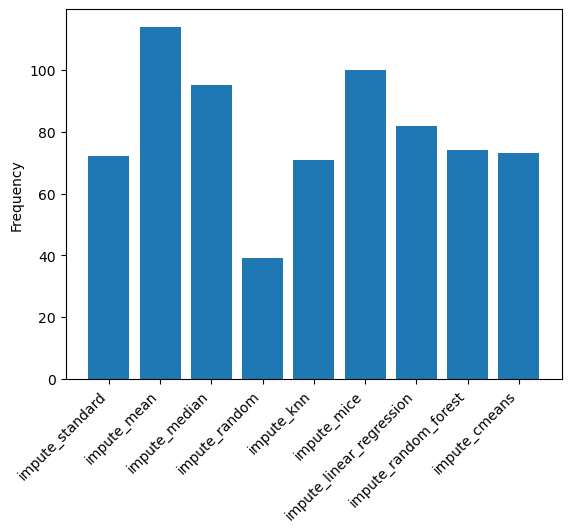

In [18]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'bank'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
# Just if data_object cont
for name, group in grouped_dataset:
    top_3_max_values = group.nlargest(3, 'final_ml_value')
    for index, row in top_3_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_3:
            technique_frequency_3[imputation_technique] += 1
        else:
            technique_frequency_3[imputation_technique] = 1
print(technique_frequency_3)
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_3.keys(), technique_frequency_3.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

{'impute_standard': 36, 'impute_mean': 33, 'impute_median': 20, 'impute_random': 5, 'impute_knn': 53, 'impute_mice': 40, 'impute_linear_regression': 31, 'impute_random_forest': 109, 'impute_cmeans': 33}


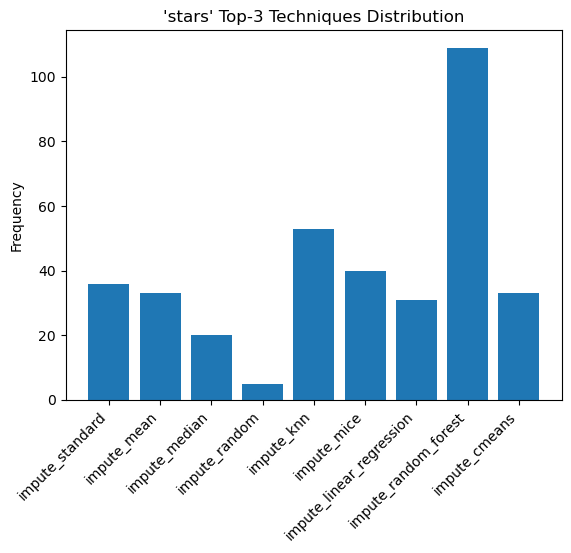

In [34]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'stars'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
technique_frequency_3 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
# Just if data_object cont
for name, group in grouped_dataset:
    top_3_max_values = group.nlargest(3, 'final_ml_value')
    for index, row in top_3_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_3:
            technique_frequency_3[imputation_technique] += 1
        else:
            technique_frequency_3[imputation_technique] = 1
print(technique_frequency_3)
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_3.keys(), technique_frequency_3.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title(f'\'{dataset_name}\' Top-3 Techniques Distribution')
plt.show()  

{'impute_standard': 3, 'impute_mean': 2, 'impute_median': 1, 'impute_random': 0, 'impute_knn': 1, 'impute_mice': 3, 'impute_linear_regression': 3, 'impute_random_forest': 106, 'impute_cmeans': 1}


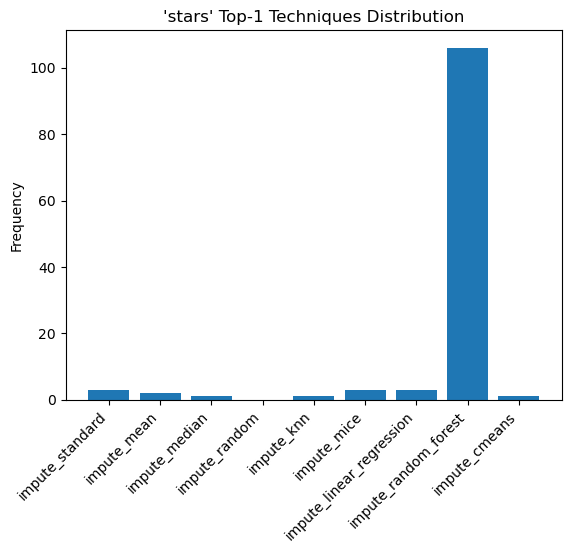

In [42]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'stars'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
technique_frequency_1 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
# Just if data_object cont
for name, group in grouped_dataset:
    top_1_max_values = group.nlargest(1, 'final_ml_value')
    for index, row in top_1_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_1:
            technique_frequency_1[imputation_technique] += 1
        else:
            technique_frequency_1[imputation_technique] = 1
print(technique_frequency_1)
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_1.keys(), technique_frequency_1.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title(f'\'{dataset_name}\' Top-1 Techniques Distribution')
plt.show()

{'impute_standard': 11, 'impute_mean': 17, 'impute_median': 16, 'impute_random': 12, 'impute_knn': 19, 'impute_mice': 13, 'impute_linear_regression': 11, 'impute_random_forest': 113, 'impute_cmeans': 14}


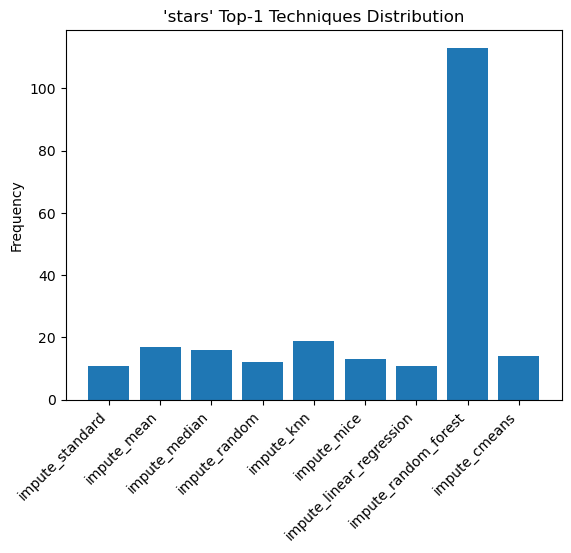

In [56]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'stars'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
technique_frequency_1 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
for name, group in grouped_dataset:
    max_value = group['final_ml_value'].max()  # Find the maximum 'final_ml_value' in the group
    # Find rows where 'final_ml_value' is within 0.005 of the max value
    near_max_values = group[group['final_ml_value'] >= max_value - 0.005]

    for index, row in near_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_1:
            technique_frequency_1[imputation_technique] += 1
        else:
            technique_frequency_1[imputation_technique] = 1
print(technique_frequency_1)
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_1.keys(), technique_frequency_1.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title(f'\'{dataset_name}\' Top-1 Techniques Distribution')
plt.show()


{'impute_standard': 405, 'impute_mean': 413, 'impute_median': 369, 'impute_random': 360, 'impute_knn': 388, 'impute_mice': 374, 'impute_linear_regression': 327, 'impute_random_forest': 359, 'impute_cmeans': 245}


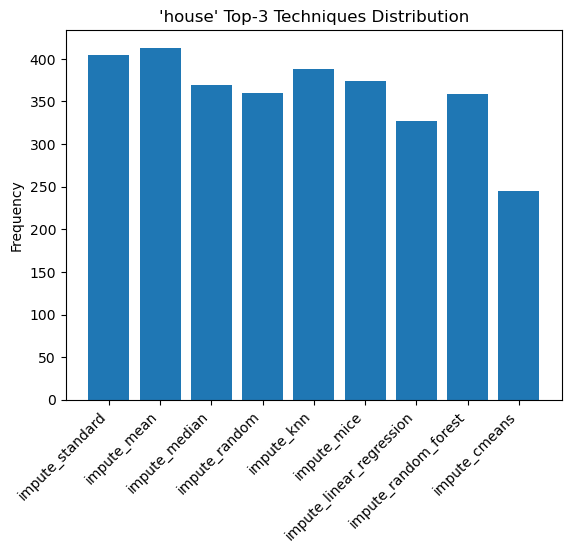

In [41]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'house'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
# Just if data_object cont
technique_frequency_3 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
for name, group in grouped_dataset:
    top_3_max_values = group.nlargest(3, 'final_ml_value')
    for index, row in top_3_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_3:
            technique_frequency_3[imputation_technique] += 1
        else:
            technique_frequency_3[imputation_technique] = 1
print(technique_frequency_3)
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_3.keys(), technique_frequency_3.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title(f'\'{dataset_name}\' Top-3 Techniques Distribution')

plt.show()

{'impute_standard': 209, 'impute_mean': 136, 'impute_median': 106, 'impute_random': 130, 'impute_knn': 125, 'impute_mice': 119, 'impute_linear_regression': 99, 'impute_random_forest': 107, 'impute_cmeans': 49}


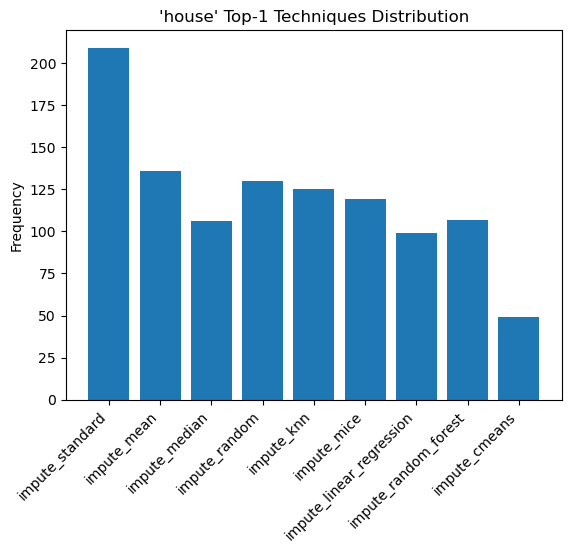

In [40]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'house'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
technique_frequency_1 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
# Just if data_object cont
for name, group in grouped_dataset:
    top_1_max_values = group.nlargest(1, 'final_ml_value')
    for index, row in top_1_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_1:
            technique_frequency_1[imputation_technique] += 1
        else:
            technique_frequency_1[imputation_technique] = 1
print(technique_frequency_1)
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_1.keys(), technique_frequency_1.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title(f'\'{dataset_name}\' Top-1 Techniques Distribution')

plt.show()

{'impute_standard': 23, 'impute_mean': 30, 'impute_median': 31, 'impute_random': 6, 'impute_knn': 13, 'impute_mice': 31, 'impute_linear_regression': 16, 'impute_random_forest': 13, 'impute_cmeans': 17}


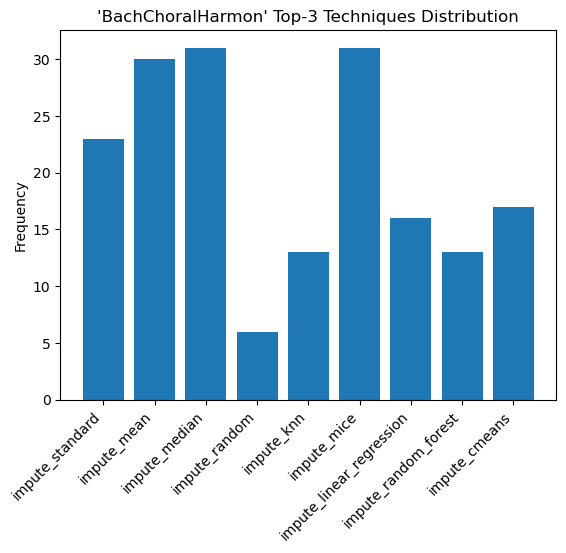

In [43]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'BachChoralHarmon'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
# Just if data_object cont
technique_frequency_3 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
for name, group in grouped_dataset:
    top_3_max_values = group.nlargest(3, 'final_ml_value')
    for index, row in top_3_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_3:
            technique_frequency_3[imputation_technique] += 1
        else:
            technique_frequency_3[imputation_technique] = 1
print(technique_frequency_3)
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_3.keys(), technique_frequency_3.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title(f'\'{dataset_name}\' Top-3 Techniques Distribution')

plt.show()

{'impute_standard': 15, 'impute_mean': 4, 'impute_median': 7, 'impute_random': 3, 'impute_knn': 6, 'impute_mice': 15, 'impute_linear_regression': 6, 'impute_random_forest': 3, 'impute_cmeans': 1}


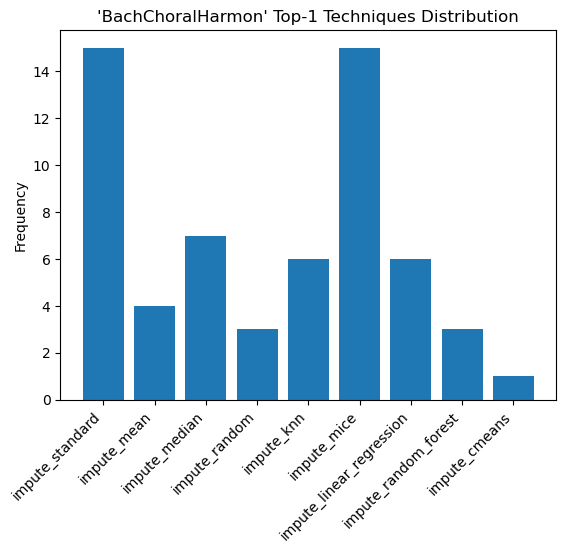

In [44]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'BachChoralHarmon'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
technique_frequency_1 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
# Just if data_object cont
for name, group in grouped_dataset:
    top_1_max_values = group.nlargest(1, 'final_ml_value')
    # Find the rows in which the 'final_ml_value' is the maximum value - 0.005
    
    for index, row in top_1_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_1:
            technique_frequency_1[imputation_technique] += 1
        else:
            technique_frequency_1[imputation_technique] = 1
print(technique_frequency_1)

# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_1.keys(), technique_frequency_1.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title(f'\'{dataset_name}\' Top-1 Techniques Distribution')

plt.show()

{'impute_standard': 428, 'impute_mean': 398, 'impute_median': 417, 'impute_random': 397, 'impute_knn': 455, 'impute_mice': 429, 'impute_linear_regression': 388, 'impute_random_forest': 469, 'impute_cmeans': 402}


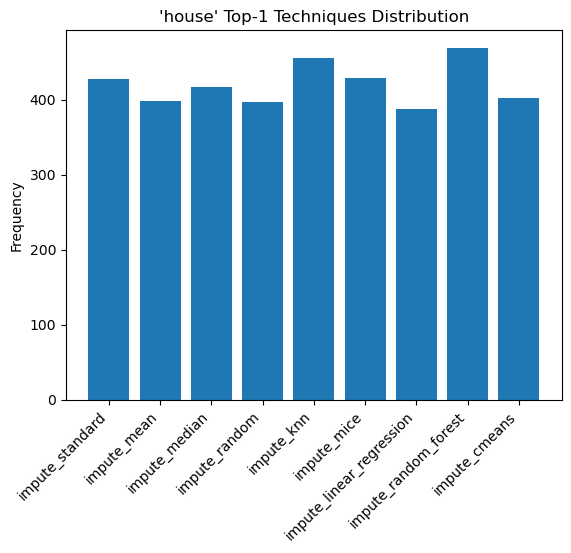

In [59]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'house'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
technique_frequency_1 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
for name, group in grouped_dataset:
    max_value = group['final_ml_value'].max()  # Find the maximum 'final_ml_value' in the group
    # Find rows where 'final_ml_value' is within 0.005 of the max value
    near_max_values = group[group['final_ml_value'] >= max_value - 0.0005]

    for index, row in near_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_1:
            technique_frequency_1[imputation_technique] += 1
        else:
            technique_frequency_1[imputation_technique] = 1

print(technique_frequency_1)
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_1.keys(), technique_frequency_1.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title(f'\'{dataset_name}\' Top-1 Techniques Distribution')

plt.show()

{'impute_standard': 11, 'impute_mean': 17, 'impute_median': 16, 'impute_random': 12, 'impute_knn': 19, 'impute_mice': 13, 'impute_linear_regression': 11, 'impute_random_forest': 113, 'impute_cmeans': 14}


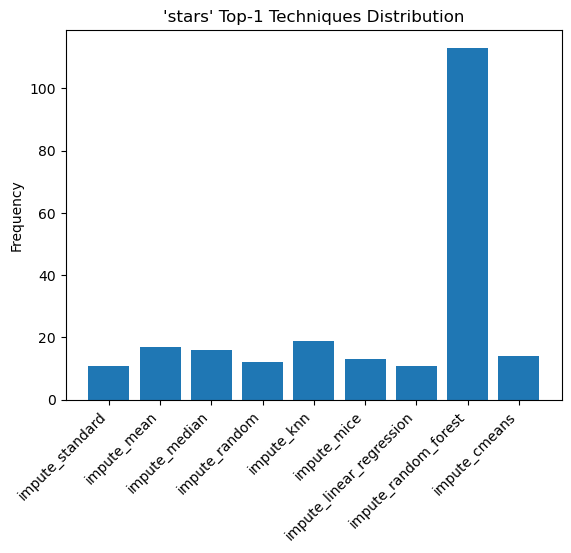

In [46]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'stars'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
technique_frequency_1 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
for name, group in grouped_dataset:
    max_value = group['final_ml_value'].max()  # Find the maximum 'final_ml_value' in the group
    # Find rows where 'final_ml_value' is within 0.005 of the max value
    near_max_values = group[group['final_ml_value'] >= max_value - 0.005]

    for index, row in near_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_1:
            technique_frequency_1[imputation_technique] += 1
        else:
            technique_frequency_1[imputation_technique] = 1

print(technique_frequency_1)
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_1.keys(), technique_frequency_1.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title(f'\'{dataset_name}\' Top-1 Techniques Distribution')

plt.show()

{'impute_standard': 161, 'impute_mean': 166, 'impute_median': 170, 'impute_random': 125, 'impute_knn': 160, 'impute_mice': 164, 'impute_linear_regression': 170, 'impute_random_forest': 166, 'impute_cmeans': 166}


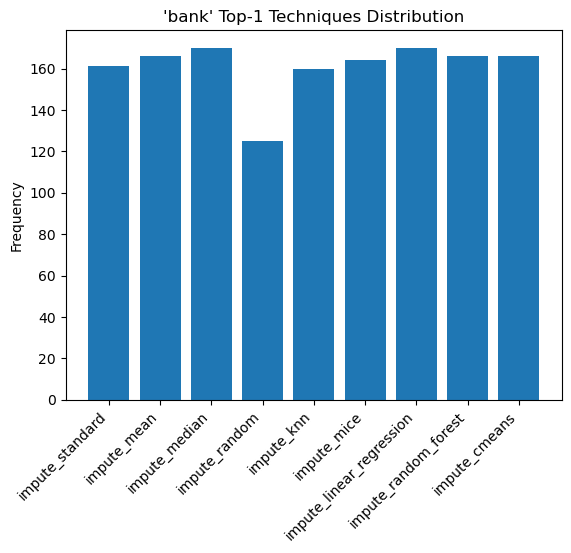

In [53]:
# Select just grouped_dataset with data_objects that contains dataset_name
dataset_name = 'bank'
grouped_dataset = og_dataset[og_dataset['data_object'].str.contains(dataset_name)].groupby(
    ['data_object', 'initial_completeness', 'ml_algorithm'])
technique_frequency_1 = {
    "impute_standard": 0,
    "impute_mean": 0,
    "impute_median": 0,
    "impute_random": 0,
    "impute_knn": 0,
    "impute_mice": 0,
    "impute_linear_regression": 0,
    "impute_random_forest": 0,
    "impute_cmeans": 0
}
for name, group in grouped_dataset:
    max_value = group['final_ml_value'].max()  # Find the maximum 'final_ml_value' in the group
    # Find rows where 'final_ml_value' is within 0.005 of the max value
    near_max_values = group[group['final_ml_value'] >= max_value - 0.005]

    for index, row in near_max_values.iterrows():
        imputation_technique = row['technique_completeness']
        if imputation_technique in technique_frequency_1:
            technique_frequency_1[imputation_technique] += 1
        else:
            technique_frequency_1[imputation_technique] = 1
print(technique_frequency_1)
# Plot an histogram with x-axis the imputation techniques and y-axis the frequency of the techniques in the top 3 max values 
# Names on x-axis 45 degrees, equal spacing and same order as the previous plot
# Title on x-axis, y-axis label
plt.bar(technique_frequency_1.keys(), technique_frequency_1.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title(f'\'{dataset_name}\' Top-1 Techniques Distribution')
plt.show()